In [2]:
import numpy as np
from matplotlib import pyplot as plt
import nifty5 as ift
from IPython.display import Image
import void_library as VL
import Pk_library as PKL

In [3]:
run_name = 'dyn_range'
run_dir = '/u/ivkos/sr/{}/'.format(run_name)
loss_dir = run_dir+'loss/'
first_gen_l1 =  np.loadtxt(loss_dir+'first_gen_cost_l1.txt')
first_gen_l2 =  np.loadtxt(loss_dir+'first_gen_cost_l2.txt')
first_gen_l_inf =  np.loadtxt(loss_dir+'first_gen_cost_l_inf.txt')
second_gen_l1 = np.loadtxt(loss_dir+'second_gen_cost_l1.txt')
second_gen_l2 = np.loadtxt(loss_dir+'second_gen_cost_l2.txt')
second_gen_l_inf = np.loadtxt(loss_dir+'second_gen_cost_l_inf.txt')

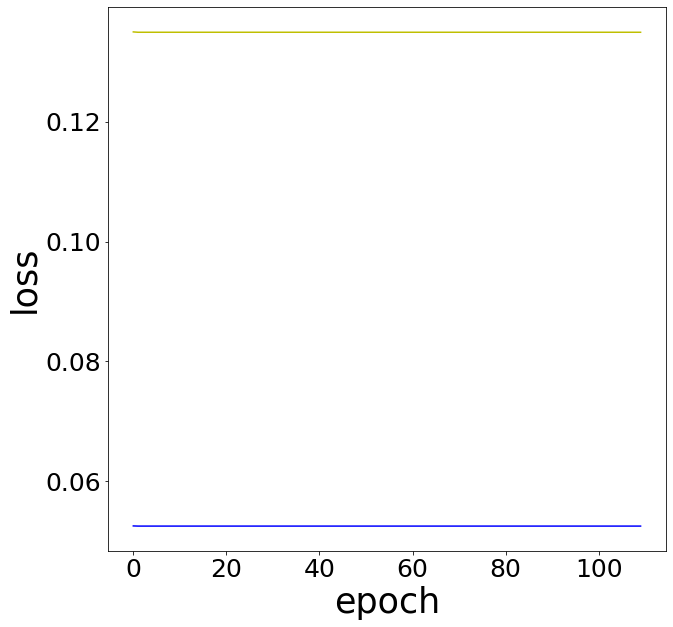

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(first_gen_l1, 'b-', label='first generator l1')
#plt.plot(first_gen_l2, 'g-', label='first generator l2')
#plt.plot(first_gen_l_inf, 'c-', label='first generator l_inf')
plt.plot(second_gen_l1, 'y-', label='second generator l1')
#plt.plot(second_gen_l2, 'm-', label='second generator l2')
#plt.plot(second_gen_l_inf, 'r-', label='second generator l_inf')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('loss', fontsize=35)
plt.tick_params(labelsize=25)
#plt.yscale('symlog')
#plt.legend()
plt.show()

In [6]:
grad_dir = run_dir+'grad/'
first_gen_grad_l1 =  np.loadtxt(grad_dir+'first_gen_grad_l1.txt')
first_gen_grad_l2 =  np.loadtxt(grad_dir+'first_gen_grad_l2.txt')
first_gen_grad_l_inf =  np.loadtxt(grad_dir+'first_gen_grad_l_inf.txt')
second_gen_grad_l1 = np.loadtxt(grad_dir+'second_gen_grad_l1.txt')
second_gen_grad_l2 = np.loadtxt(grad_dir+'second_gen_grad_l2.txt')
second_gen_grad_l_inf = np.loadtxt(grad_dir+'second_gen_grad_l_inf.txt')

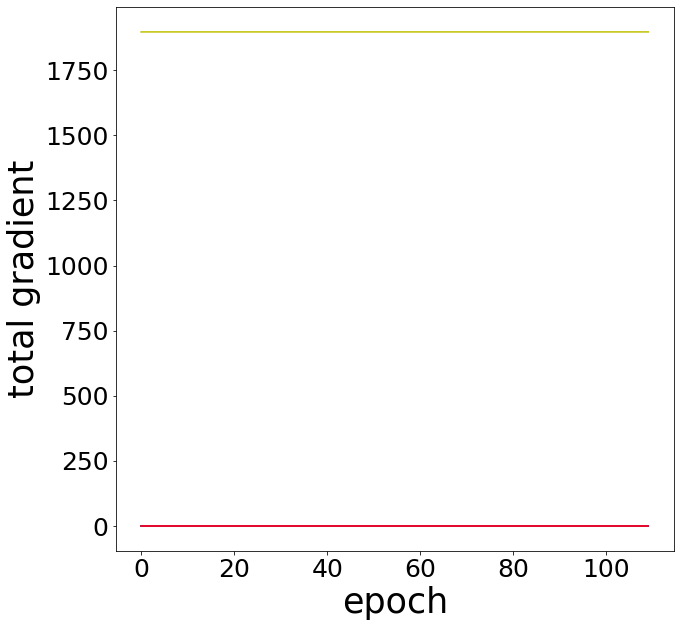

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(first_gen_grad_l1, 'b-', label='first generator l1')
plt.plot(first_gen_grad_l2, 'g-', label='first generator l2')
plt.plot(first_gen_grad_l_inf, 'c-', label='first generator l_inf')
plt.plot(second_gen_grad_l1, 'y-', label='second generator l1')
plt.plot(second_gen_grad_l2, 'm-', label='second generator l2')
plt.plot(second_gen_grad_l_inf, 'r-', label='second generator l_inf')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('total gradient', fontsize=35)
plt.tick_params(labelsize=25)
#plt.yscale('log')
plt.show()

In [8]:
path_to_data = '/u/ivkos/sr/GriddedSimulationsTesting/'
path_to_sr = '/u/ivkos/sr/Output/{}/'.format(run_name)

In [9]:
def scale(data, epsilon=1e-9):
    return np.log(data+epsilon)/25
def unscale(data, epsilon=1e-9):
    return (np.exp(25*(data))-epsilon)

In [10]:
def take_slice(data, axis=0, slice_num=420):
    if axis == 0:
        slice_data = np.zeros(())
        return np.copy(data[slice_num,...])
    elif axis == 1:
        return np.copy(data[:,slice_num,:])
    else:
        return np.copy(data[:,:,slice_num])

In [11]:
sim256_grid512_path = path_to_data+'test256_grid512.npy'
sim512_grid512_path = path_to_data+'test512_grid512.npy' 
sr_path1 = path_to_sr+'{}_sr_output_ckpt1.npy'.format(run_name)
sr_path2 = path_to_sr+'{}_sr_output_ckpt11.npy'.format(run_name)
sr_path3 = path_to_sr+'{}_sr_output_ckpt21.npy'.format(run_name)
sr_path4 = path_to_sr+'{}_sr_output_ckpt31.npy'.format(run_name)
sr_final = path_to_sr+'{}_sr_output_ckpt22.npy'.format(run_name)

In [89]:
sim = np.load(sim256_grid512_path)
print(np.amax(sim))
print(np.amin(sim))
print(np.median(sim))
slice256_grid512 = take_slice(sim)

sim = np.load(sim512_grid512_path)   
print(np.amax(sim))
print(np.amin(sim))
print(np.median(sim))  
slice512_grid512 = take_slice(sim)

sim = np.load(sr_path1)
print(np.amax(sim))
print(np.amin(sim))
print(np.median(sim))  
sliceSR1= take_slice(sim)

sim = np.load(sr_path2)
print(np.amax(sim))
print(np.amin(sim))
print(np.median(sim))  
sliceSR2= take_slice(sim)

sim = np.load(sr_path3)
print(np.amax(sim))
print(np.amin(sim))
print(np.median(sim))  
sliceSR3= take_slice(sim)

sim = np.load(sr_final)
print(np.amax(sim))
print(np.amin(sim))
print(np.median(sim))  
sliceSR_final= take_slice(sim)

# sim = np.load(sr_path4)
# print(np.amax(sim))
# print(np.amin(sim))
# print(np.median(sim))  
# sliceSR4= take_slice(sim)

del sim

0.8491909
0.0
1.3475185e-05
0.8474966
0.0
1.0945202e-05
0.82702446
5.6502225e-10
1.1136217e-05
0.9271279
1.5962327e-08
1.12094785e-05
0.92070526
2.9675405e-08
1.12692405e-05
0.9179342
2.9817908e-08
1.1273583e-05


Text(0.5, 1.0, 'SR_ckpt21')

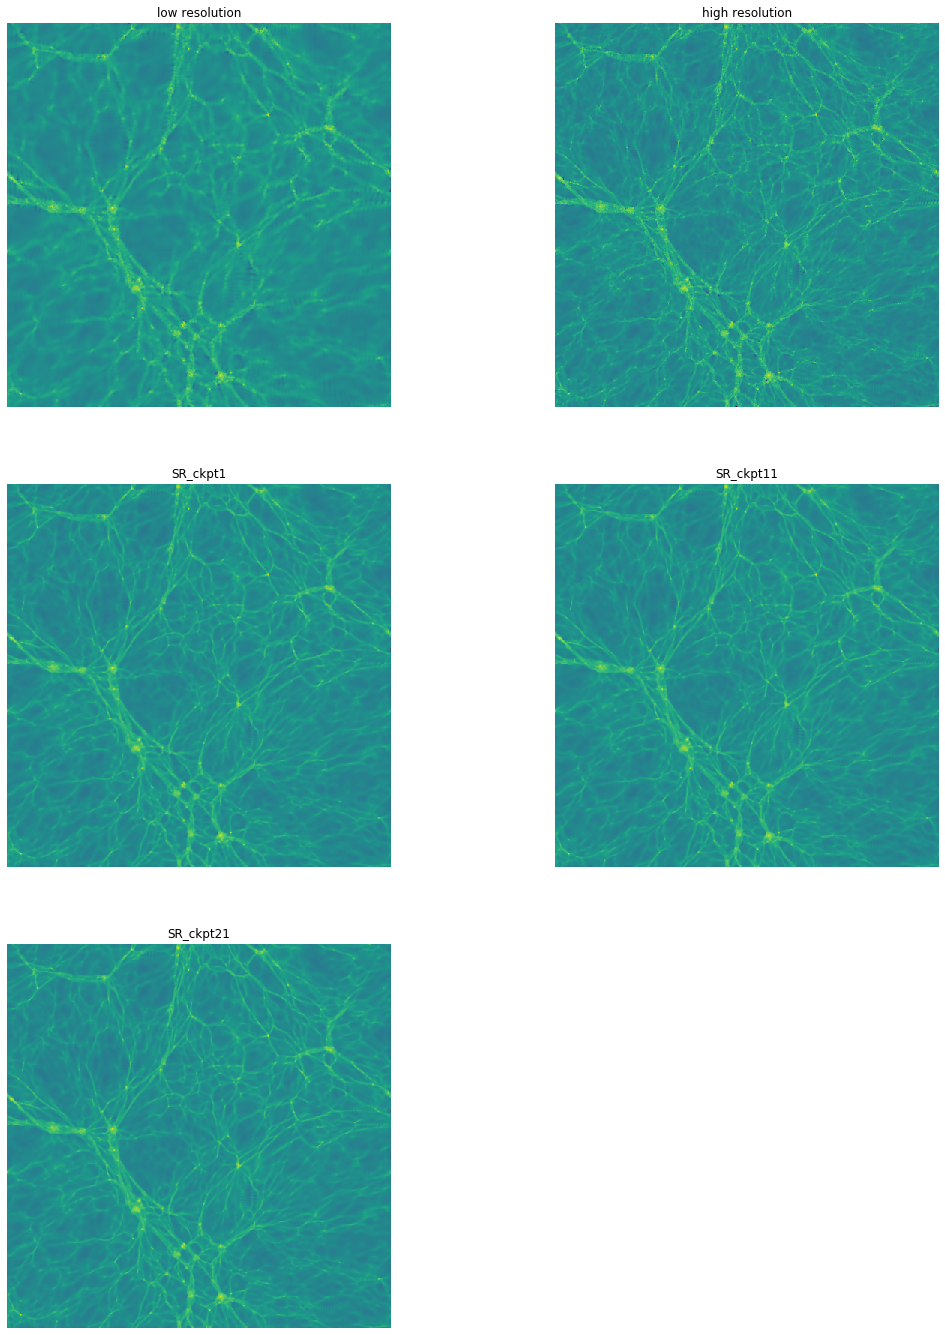

In [20]:
v_min = np.amin(scale(slice512_grid512))
v_max = np.amax(scale(slice512_grid512))

f = plt.figure(figsize=(18, 24))
f.add_subplot(3,2, 1)
plt.imshow(scale(slice256_grid512), label='lr', vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('low resolution')

f.add_subplot(3,2, 2)
plt.imshow(scale(slice512_grid512), label='lr', vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('high resolution')

f.add_subplot(3,2, 3)
plt.imshow(scale(sliceSR1), vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('SR_ckpt1')

f.add_subplot(3,2, 4)
plt.imshow(scale(sliceSR2), vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('SR_ckpt11')

f.add_subplot(3,2, 5)
plt.imshow(scale(sliceSR3), vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('SR_ckpt21')

# f.add_subplot(3,2, 6)
# plt.imshow(scale(sliceSR4), vmin=v_min, vmax=v_max)
# plt.axis('off')
# plt.title('SR_ckpt31')
# plt.show()

(-0.5, 511.5, 511.5, -0.5)

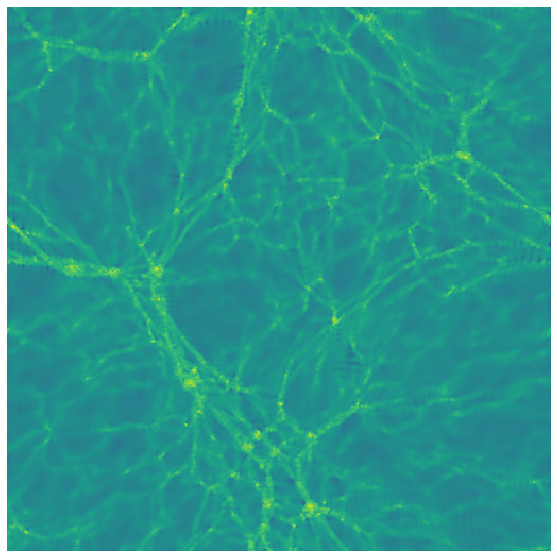

In [137]:
v_min = np.amin(scale(slice512_grid512))
v_max = np.amax(scale(slice512_grid512))

plt.figure(figsize=(10, 10))
plt.imshow(scale(slice256_grid512), label='lr', vmin=v_min, vmax=v_max)
plt.axis('off')

In [21]:
def hist(data, min_value=-5., max_value=5.,bins=100):
    edges = np.logspace(min_value, max_value, bins+1)
    hist, _ = np.histogram(data,edges)
    midpoints = np.zeros(len(edges)-1)
    bin_widths = np.zeros(len(edges)-1)
    for i in range(len(midpoints)):
        midpoints[i] = np.power(10.,np.log10(edges[i])+np.log10(edges[i+1]/edges[i])/2)
        bin_widths[i] = edges[i+1]-edges[i]
    hist = hist/hist.sum()
    hist = hist/bin_widths
    return (midpoints, hist)

In [22]:
def hist2(data, min_value=-10., max_value=2.,bins=100):
    edges = np.linspace(min_value, max_value, bins+1)
    hist, _ = np.histogram(data,edges)
    midpoints = np.zeros(len(edges)-1)
    bin_widths = np.zeros(len(edges)-1)
    for i in range(len(midpoints)):
        midpoints[i] = (edges[i]+edges[i+1])/2
        bin_widths[i] = edges[i+1]-edges[i]
    hist = hist/hist.sum()
    hist = hist/bin_widths
    return (midpoints, hist)

In [23]:
sim = np.load(sim256_grid512_path)
lr_max = np.amax(sim)
delta =  (sim)/np.average(sim)
midpoints256, histogram256 = hist(delta)
del sim

In [24]:
sim = np.load(sim512_grid512_path)
delta =  (sim)/np.average(sim)
midpoints, histogram = hist(delta)
del sim

In [25]:
sim = np.load(sr_path1)
delta =  (sim)/np.average(sim)
midpoints_sr1, histogram_sr1 = hist(delta)
del sim

In [26]:
sim = np.load(sr_path2)
delta =  (sim)/np.average(sim)
midpoints_sr2, histogram_sr2 = hist(delta)
del sim

In [27]:
sim = np.load(sr_path3)
delta =  (sim)/np.average(sim)
midpoints_sr3, histogram_sr3 = hist(delta)
del sim

In [19]:
sim = np.load(sr_path4)
delta =  (sim)/np.average(sim)
midpoints_sr4, histogram_sr4 = hist(delta)
del sim

FileNotFoundError: [Errno 2] No such file or directory: '/u/ivkos/sr/Output/l1_and_l2/l1_and_l2_sr_output_ckpt31.npy'

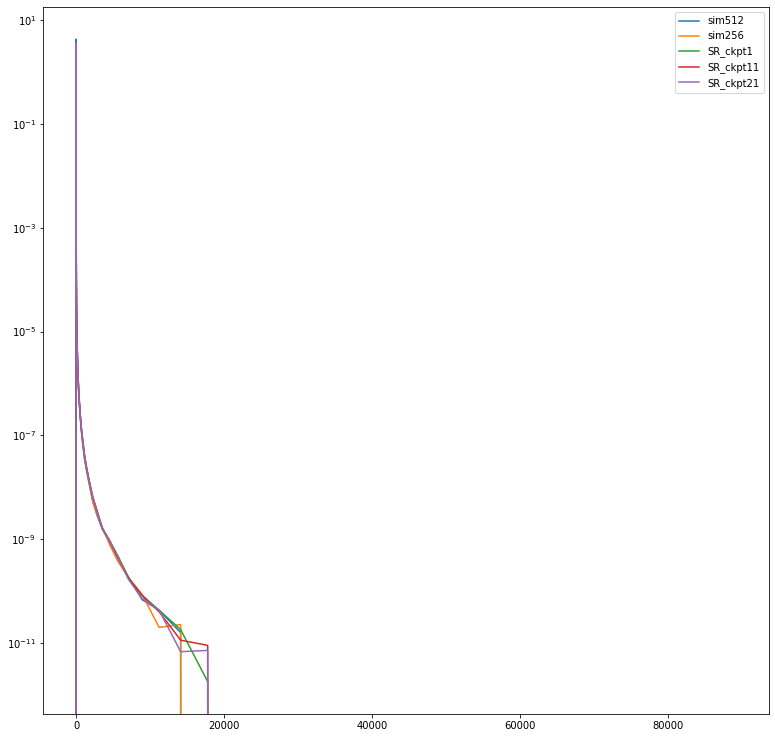

In [28]:
f = plt.figure(figsize=(13, 13))
plt.plot(midpoints, histogram, label='sim512')
plt.plot(midpoints256, histogram256, label='sim256')
plt.plot(midpoints_sr1, histogram_sr1, label='SR_ckpt1')
plt.plot(midpoints_sr2, histogram_sr2, label='SR_ckpt11')
plt.plot(midpoints_sr3, histogram_sr3, label='SR_ckpt21')
#plt.plot(midpoints_sr4, histogram_sr4, label='SR_ckpt31')

plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()

Plot the relative one point histograms

/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launche

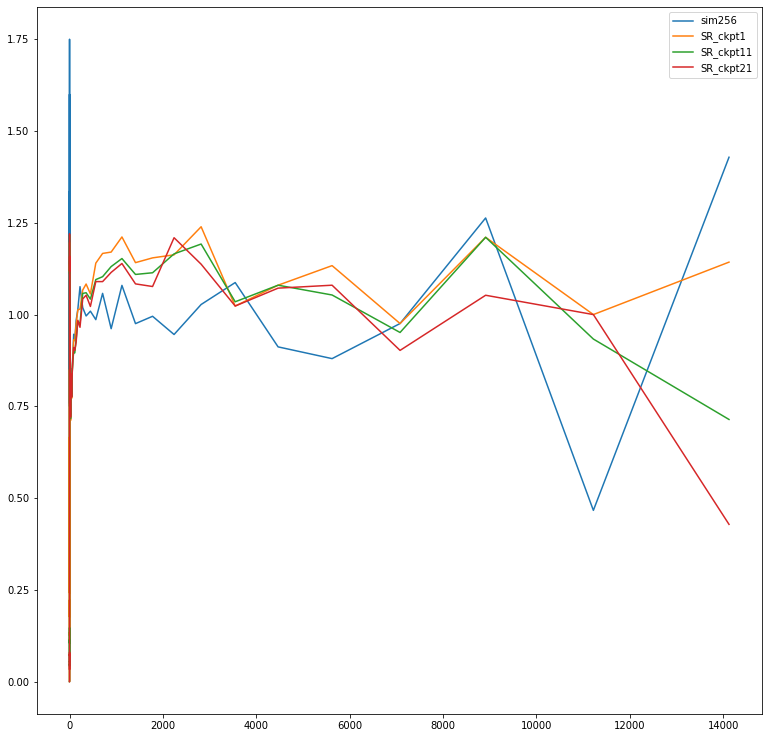

In [29]:
f = plt.figure(figsize=(13, 13))
plt.plot(midpoints256, histogram256/histogram, label='sim256')
plt.plot(midpoints_sr1, histogram_sr1/histogram, label='SR_ckpt1')
plt.plot(midpoints_sr2, histogram_sr2/histogram, label='SR_ckpt11')
plt.plot(midpoints_sr3, histogram_sr3/histogram, label='SR_ckpt21')
#plt.plot(midpoints_sr4, histogram_sr4/histogram, label='SR_ckpt31')
#plt.xscale('log')
plt.legend()
plt.show()

In [30]:
def powerspectrum(delta,size=10, binsize=20):
    position_space = ift.RGSpace([delta.shape[0], delta.shape[1], delta.shape[2]], 
                                 distances=(size/delta.shape[0], 
                                            size/delta.shape[1], size/delta.shape[2]))
    harmonic_space = position_space.get_default_codomain()
    HT = ift.HartleyOperator(harmonic_space, position_space)
    image = ift.Field.from_global_data(position_space, delta)
    ht_image = HT.inverse(image)
    power_spec = ift.power_analyze(ht_image)
    k_values = power_spec.domain[0].k_lengths
    power_spec = ift.Field.to_global_data(power_spec)
    binned_k = []
    binned_power_spec = []
    binsize = 10
    for i in range(int(power_spec.shape[0]/binsize)):
        binned_k.append(np.average(k_values[i*binsize:(i+1)*binsize]))
        binned_power_spec.append(np.average(power_spec[i*binsize:(i+1)*binsize]))

    spectrum = np.zeros((2, len(binned_k)))
    spectrum[0, ...] = binned_k
    spectrum[1, ...] = binned_power_spec
    return (spectrum[0,...], spectrum[1,...]/size**3)

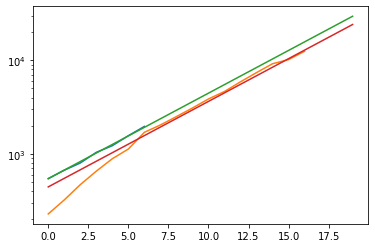

3.3007008598092633


In [64]:
a = np.array([545, 670, 800, 1040, 1224, 1565, 1966])
b = ([229, 323, 470, 655, 889, 1128, 1701, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462])

plt.plot(a)
plt.plot(b)
x = np.arange(20)
plt.plot(545*np.exp(0.21*x))
plt.plot(445*np.exp(0.21*x))
plt.yscale('log')
plt.show()
print(np.log(2)/0.21)

In [31]:
sim = np.load(sim512_grid512_path)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k_values_512, proj_power_512 = powerspectrum(delta)

In [32]:
sim = np.load(sim256_grid512_path)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k_values_256, proj_power_256  = powerspectrum(delta)

In [33]:
sim = np.load(sr_path1)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k_values_sr1, proj_power_sr1 = powerspectrum(delta)

In [34]:
sim = np.load(sr_path2)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k_values_sr2, proj_power_sr2 = powerspectrum(delta)

In [35]:
sim = np.load(sr_path3)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k_values_sr3, proj_power_sr3 = powerspectrum(delta)

In [66]:
sim = np.load(sr_path4)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k_values_sr4 , proj_power_sr4 = powerspectrum(delta)

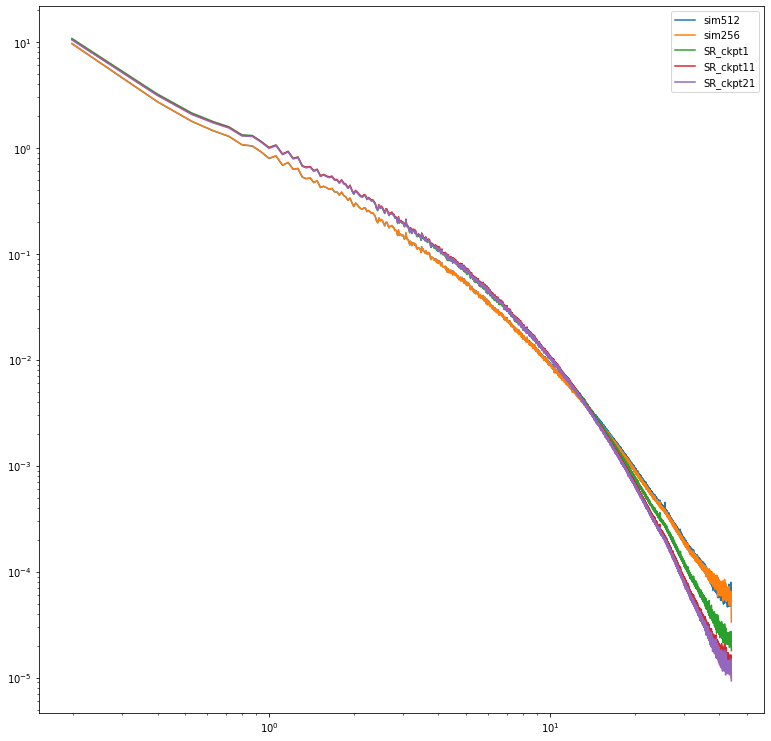

In [36]:
f = plt.figure(figsize=(13, 13))
plt.plot(k_values_512, proj_power_512, label='sim512')
plt.plot(k_values_256, proj_power_256, label='sim256')
plt.plot(k_values_sr1, proj_power_sr1, label='SR_ckpt1')
plt.plot(k_values_sr2, proj_power_sr2, label='SR_ckpt11')
plt.plot(k_values_sr3, proj_power_sr3, label='SR_ckpt21')
#plt.plot(k_values_sr4, proj_power_sr4, label='SR_ckpt31')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

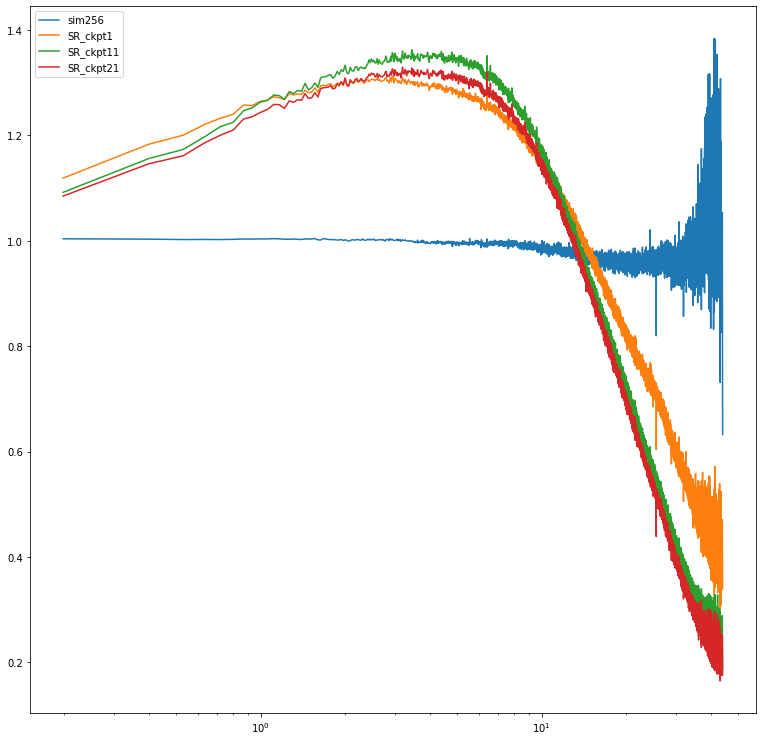

In [38]:
f = plt.figure(figsize=(13, 13))
plt.plot(k_values_256, proj_power_256/proj_power_512, label='sim256')
plt.plot(k_values_sr1, proj_power_sr1/proj_power_512, label='SR_ckpt1')
plt.plot(k_values_sr2, proj_power_sr2/proj_power_512, label='SR_ckpt11')
plt.plot(k_values_sr3, proj_power_sr3/proj_power_512, label='SR_ckpt21')
#plt.plot(k_values_sr4, proj_power_sr4/proj_power_512, label='SR_ckpt31')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()